In [1]:
# Importação das bibliotecas
from scipy.stats import loguniform, uniform
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV

from SwarmPackagePy import gwo
import pyswarms as ps

In [2]:
# Tratamento das imagens
def create_street_data(path, street_types, im_size):
    images, labels = [], []
    streets = [(item, os.path.join(path, item, street)) 
               for item in street_types 
               for street in os.listdir(os.path.join(path, item))]
    streets_df = pd.DataFrame(streets, columns=['street type', 'image'])
    
    for _, row in streets_df.iterrows():
        img = load_img(row['image'], target_size=(im_size, im_size))
        images.append(img_to_array(img))
        labels.append(row['street type'])
    
    return np.array(images, dtype='float32') / 255.0, np.array(labels)

In [3]:
model = load_model('IC_Project_Fase3_Simple_SaveModel.h5')

im_size = 224

street_types = ['clean', 'litter', 'recycle']
path = 'Dataset_ToUse/'

In [4]:
toUse_images, toUse_labels = create_street_data(path, street_types, im_size)

streets_count = pd.value_counts(toUse_labels)
print("Streets in each category:", streets_count)

label_encoder = LabelEncoder()
toUse_labels_encoded = label_encoder.fit_transform(toUse_labels)

print(f"toUse shape: {toUse_images.shape}")

Streets in each category: clean      6
litter     4
recycle    3
dtype: int64
toUse shape: (13, 224, 224, 3)


1/1 [==============================] - 1s 1s/step


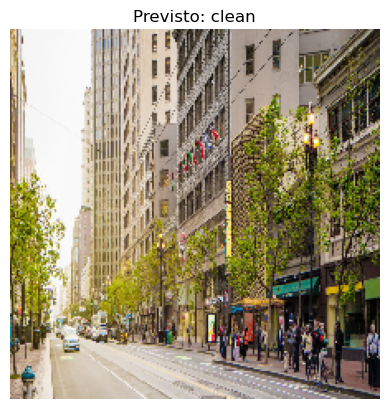

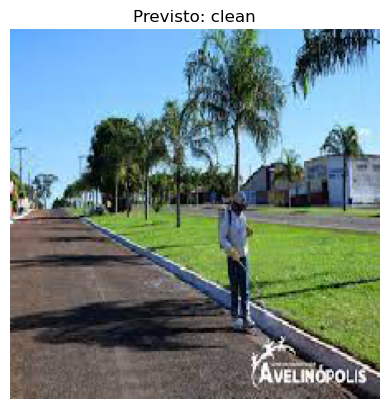

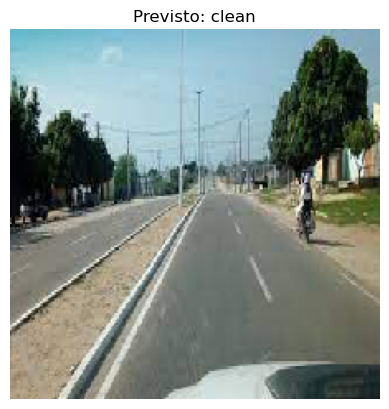

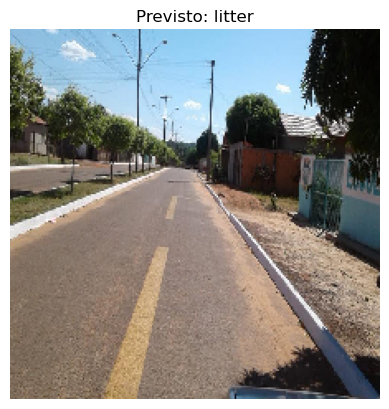

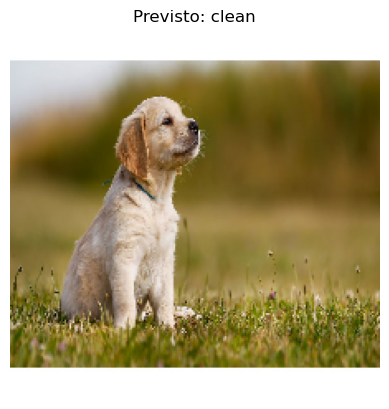

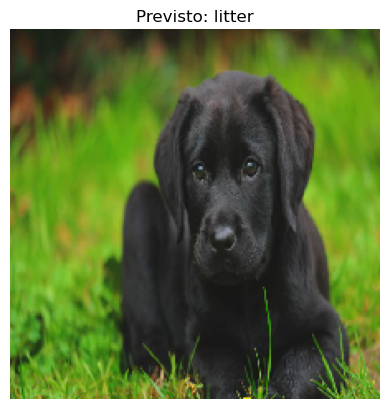

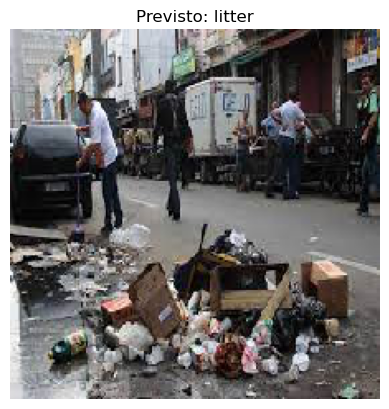

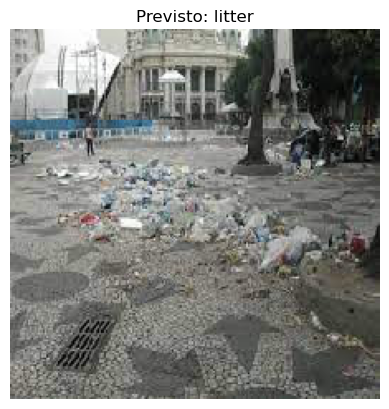

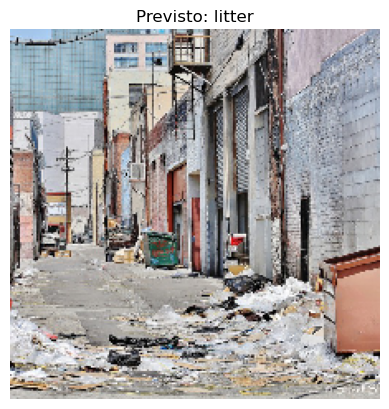

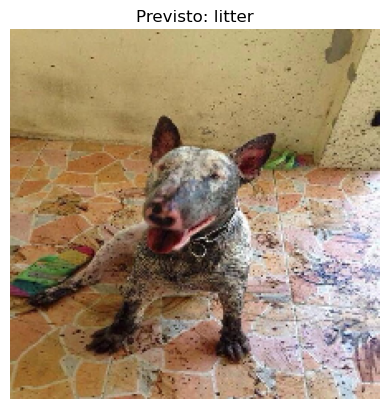

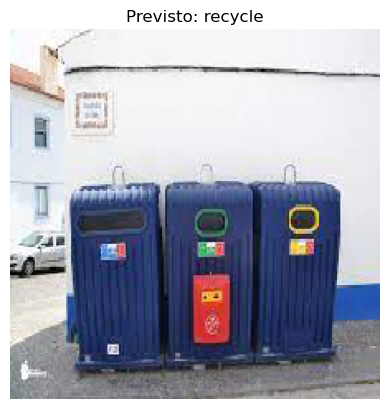

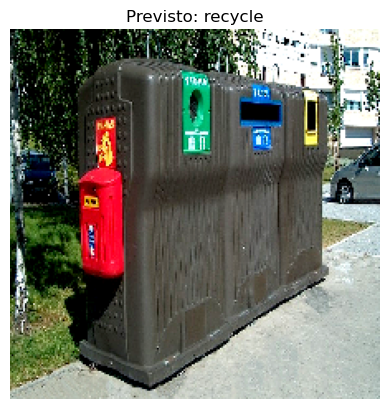

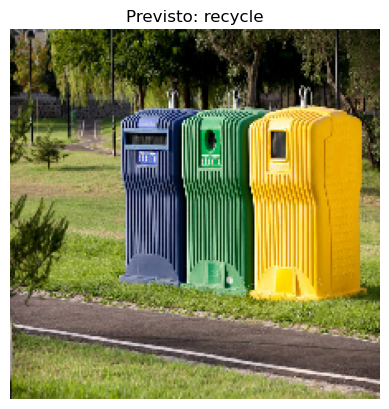


Acurácia no teste: 84.62%

Matriz de Confusão:
[[4 2 0]
 [0 4 0]
 [0 0 3]]

Relatório de Classificação:
              precision    recall  f1-score   support

       clean       1.00      0.67      0.80         6
      litter       0.67      1.00      0.80         4
     recycle       1.00      1.00      1.00         3

    accuracy                           0.85        13
   macro avg       0.89      0.89      0.87        13
weighted avg       0.90      0.85      0.85        13

AUC para a classe clean: 1.00
AUC para a classe litter: 1.00
AUC para a classe recycle: 1.00


In [5]:
# Avaliação e análise
toUse_loss, toUse_accuracy = model.evaluate(toUse_images, toUse_labels_encoded, verbose=1)

y_pred_toUse = model.predict(toUse_images)
y_pred_toUse_classes = np.argmax(y_pred_toUse, axis=1)

for i in range(len(toUse_images)):
    plt.imshow(toUse_images[i])
    plt.axis('off')
    
    predicted_label = label_encoder.classes_[y_pred_toUse_classes[i]]
    
    plt.title(f'Previsto: {predicted_label}')
    
    plt.show()
    
print(f"\nAcurácia no teste: {toUse_accuracy*100:.2f}%\n")

confusion_mtx = confusion_matrix(toUse_labels_encoded, y_pred_toUse_classes)
print("Matriz de Confusão:")
print(confusion_mtx)

class_report = classification_report(toUse_labels_encoded, y_pred_toUse_classes, target_names=label_encoder.classes_)
print("\nRelatório de Classificação:")
print(class_report)

y_true_binarized = to_categorical(toUse_labels_encoded)

for i in range(y_true_binarized.shape[1]):
    auc_score = roc_auc_score(y_true_binarized[:, i], y_pred_toUse[:, i])
    print(f'AUC para a classe {label_encoder.classes_[i]}: {auc_score:.2f}')